In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def mnk(x,y,free=1):
    k,a=np.polyfit(x, y, free)
    mu = np.mean(y) # средее
    mv = np.mean(x)
    mu2 = np.mean(y**2)
    mv2 = np.mean(x**2) # средний квадрат
    muv = np.mean (x*y) 
    sigma_k = np.sqrt(1/(x.shape[0]-2) * ( (mu2 - mu**2)/(mv2 - mv**2) - k**2 ) )
    print("Погрешность углового коэфицента")
    print(sigma_k)
    sigma_b = sigma_k * np.sqrt(mv2-mv**2)
    print("Погрешность свободного коэфицента")
    print(sigma_b)
    return (k,a)

In [3]:
zero=pd.DataFrame({"U":[111.7, 227.1, 329.0, 450.5, 559.3, 674.2, 791.8], "I":[10.14, 20.55, 29.69, 40.46, 50.03, 59.98, 69.81]})
zero["R"]=zero.U/zero.I
zero["Q"]=zero.U*zero.I/1000
zero

,U,I,R,Q
0,111.7,10.14,11.015779,1.132638
1,227.1,20.55,11.051095,4.666905
2,329.0,29.69,11.081172,9.768010
3,450.5,40.46,11.134454,18.227230
4,559.3,50.03,11.179292,27.981779
5,674.2,59.98,11.240413,40.438516
6,791.8,69.81,11.342215,55.275558


In [4]:
k0,a0=mnk(zero.Q,zero.R)
print(k0,a0)

Погрешность углового коэфицента
0.0001876415834638594
Погрешность свободного коэфицента
0.0034606819161177864
0.005735717183600079 11.02015694393242


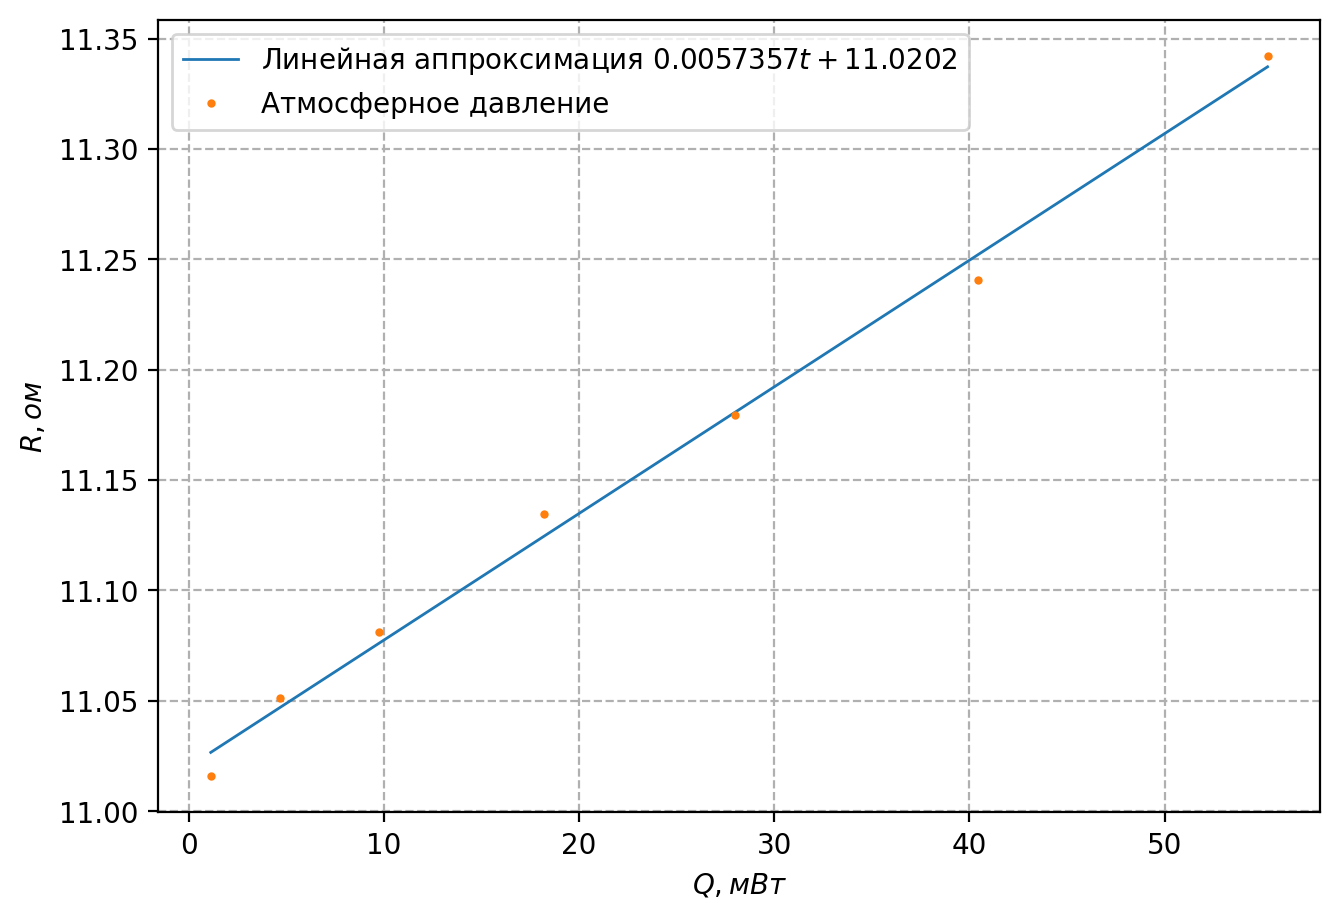

In [5]:
plt.figure(figsize=(30/4,21/4), dpi=200) # размер графика
plt.ylabel("$R, ом$") # подписи к осям
plt.xlabel("$Q, мВт$")
plt.grid(True, linestyle="--") # сетка
plt.plot(zero["Q"], k0 * zero["Q"] + a0,linewidth=1, label="Линейная аппроксимация $%.7f t + %.4f$" % (k0, a0)) # аппроксимация
plt.errorbar(zero["Q"], zero["R"], label="Атмосферное давление", fmt="o", ms=2)
plt.legend() # легенда

In [6]:
print(zero.T.style.to_latex(clines="all;data"))

\begin{tabular}{lrrrrrrr}
 & 0 & 1 & 2 & 3 & 4 & 5 & 6 \\
U & 111.700000 & 227.100000 & 329.000000 & 450.500000 & 559.300000 & 674.200000 & 791.800000 \\
\cline{1-8}
I & 10.140000 & 20.550000 & 29.690000 & 40.460000 & 50.030000 & 59.980000 & 69.810000 \\
\cline{1-8}
R & 11.015779 & 11.051095 & 11.081172 & 11.134454 & 11.179292 & 11.240413 & 11.342215 \\
\cline{1-8}
Q & 1.132638 & 4.666905 & 9.768010 & 18.227230 & 27.981779 & 40.438516 & 55.275558 \\
\cline{1-8}
\end{tabular}



In [7]:
mm8=pd.DataFrame({"U":[112.2, 228.1, 331.1, 454.6, 574.1, 694.3, 821.5], "I":[10.14, 20.55, 29.66, 40.36, 50.39, 60.16, 70.10]})
mm12=pd.DataFrame({"U":[111.8, 227.6, 335.0, 452.0, 567.3, 685.1, 813.1], "I":[10.12, 20.55, 30.13, 40.43, 50.28, 60.04, 70.20]})
mm22=pd.DataFrame({"U":[110.9, 277.1, 447.9, 622.8, 806.9], "I":[10.06, 25.02, 40.12, 55.10, 70.16]})
mm30=pd.DataFrame({"U":[111.2, 332.1, 560.2, 801.1], "I":[10.11, 30.02, 50.01, 70.08]})
mm40=pd.DataFrame({"U":[109.7, 338.9, 566.0, 798.9], "I":[10.00, 30.72, 50.69, 70.21]})
mm49=pd.DataFrame({"U":[110.7, 338.1, 558.1, 795.4], "I":[10.11, 30.68, 50.08, 70.01]})
torr11d4=pd.DataFrame({"U":[110.3, 333.3, 558.3, 793.7], "I":[10.05, 30.21, 50.07, 70.10]})
torr80=pd.DataFrame({"U":[110.3, 331.4, 558.2, 793.6], "I":[10.05, 30.03, 50.08, 70.12]})
torr251=pd.DataFrame({"U":[111.1, 333.8, 558.6, 793.8], "I":[10.10, 30.21, 50.06, 70.10]})


In [8]:
data=[[ mm8 ,70.8],[ mm12 ,106.2],[mm22,194.7] , [mm30,265.5], [mm40, 354], [mm49, 433.7], [torr11d4, 1519], [torr80, 10664], [torr251, 33458]]

In [9]:
((112.200000/10.140000)/(10.029)-1)*1e3/3.92

26.354407865059898

Погрешность углового коэфицента
0.002001799486893412
Погрешность свободного коэфицента
0.038521156839547856
0.29746290253034996 25.959378556990206


\begin{tabular}{lrrrr}
 & U & I & T & Q \\
0 & 112.200000 & 10.140000 & 26.354408 & 1.137708 \\
\cline{1-5}
1 & 228.100000 & 20.550000 & 27.236237 & 4.687455 \\
\cline{1-5}
2 & 331.100000 & 29.660000 & 28.849569 & 9.820426 \\
\cline{1-5}
3 & 454.600000 & 40.360000 & 31.404523 & 18.347656 \\
\cline{1-5}
4 & 574.100000 & 50.390000 & 34.698699 & 28.928899 \\
\cline{1-5}
5 & 694.300000 & 60.160000 & 38.457121 & 41.769088 \\
\cline{1-5}
6 & 821.500000 & 70.100000 & 42.986891 & 57.587150 \\
\cline{1-5}
\end{tabular}



Погрешность углового коэфицента
0.00699768363824682
Погрешность свободного коэфицента
0.13286707946281962
0.2427947375261591 25.285202817746004


\begin{tabular}{lrrrr}
 & U & I & T & Q \\
0 & 111.800000 & 10.120000 & 25.905253 & 1.131416 \\
\cline{1-5}
1 & 227.600000 & 20.550000 & 26.617345 & 4.677180 \\
\cline{1-5}
2 & 335.00000

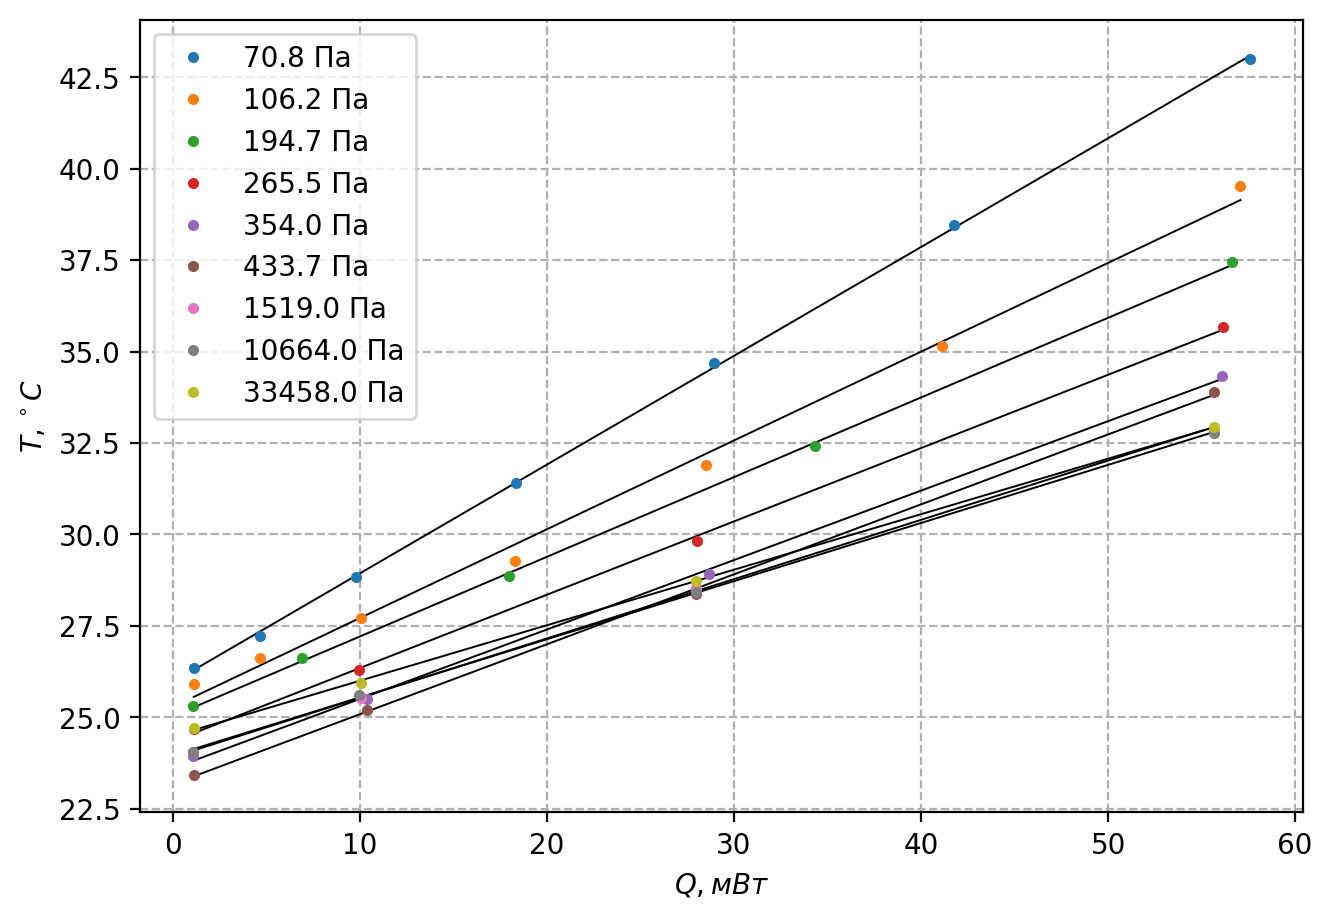

In [10]:
plt.figure(figsize=(30/4,21/4), dpi=200) # размер графика
plt.ylabel("$T, ^\circ C$") # подписи к осям
plt.xlabel("$Q, мВт$")
plt.grid(True, linestyle="--") # сетка
for i in data:
    exp=i[0]
    pres=i[1]
    exp["T"]=((exp["U"]/exp["I"])/(10.029)-1)*1e3/3.92
    exp["Q"]=exp.U*exp.I/1000
    k,a=mnk(exp["Q"], exp["T"])
    print(k,a)
    plt.plot(exp["Q"], k * exp["Q"] + a,linewidth=0.7, color='k') # аппроксимация
    plt.errorbar(exp["Q"], exp["T"], label="%.1f Па" % pres, fmt="o", ms=3)
    print("\n")
    print(exp.style.to_latex(clines="all;data"))
    print("\n")
    
plt.legend() # легенда
    
    

In [11]:
fin=pd.DataFrame({"P":[70.8, 106.2, 194.7, 265.5, 354, 433.7, 1519, 10664, 33458],
                   "K":[2.98, 2.43, 2.18, 2.01, 1.90, 1.91, 1.623,1.591,1.520], 
                   "sK":[0.02, 0.07, 0.02, 0.03, 0.04,0.03,0.015,0.017, 0.013 ],
                   "T0":[262.4,255.7, 253.1,246.2, 238.8, 234.5,241.9,242.3, 247.6 ],
                   "sT0":[0.4, 1.3, 0.4, 0.7, 0.7, 0.6, 0.3, 0.3, 0.3]})


In [12]:
fin["pT0"]=np.sqrt(fin["sT0"]**2+(fin["T0"]*0.002)**2)

In [13]:
print(fin.T.style.to_latex(clines="all;data"))

\begin{tabular}{lrrrrrrrrr}
 & 0 & 1 & 2 & 3 & 4 & 5 & 6 & 7 & 8 \\
P & 70.800000 & 106.200000 & 194.700000 & 265.500000 & 354.000000 & 433.700000 & 1519.000000 & 10664.000000 & 33458.000000 \\
\cline{1-10}
K & 2.980000 & 2.430000 & 2.180000 & 2.010000 & 1.900000 & 1.910000 & 1.623000 & 1.591000 & 1.520000 \\
\cline{1-10}
sK & 0.020000 & 0.070000 & 0.020000 & 0.030000 & 0.040000 & 0.030000 & 0.015000 & 0.017000 & 0.013000 \\
\cline{1-10}
T0 & 262.400000 & 255.700000 & 253.100000 & 246.200000 & 238.800000 & 234.500000 & 241.900000 & 242.300000 & 247.600000 \\
\cline{1-10}
sT0 & 0.400000 & 1.300000 & 0.400000 & 0.700000 & 0.700000 & 0.600000 & 0.300000 & 0.300000 & 0.300000 \\
\cline{1-10}
pT0 & 0.659860 & 1.396972 & 0.645165 & 0.855837 & 0.847409 & 0.761552 & 0.569265 & 0.569945 & 0.578984 \\
\cline{1-10}
\end{tabular}



In [25]:
fin["1/P"]=1/fin["P"]
fin["ln"]=np.log(fin["P"])

In [31]:
k3,a3=mnk(fin["1/P"].iloc[:6], fin["K"].iloc[:6])

Погрешность углового коэфицента
5.5222572280320446
Погрешность свободного коэфицента
0.02329033412864331


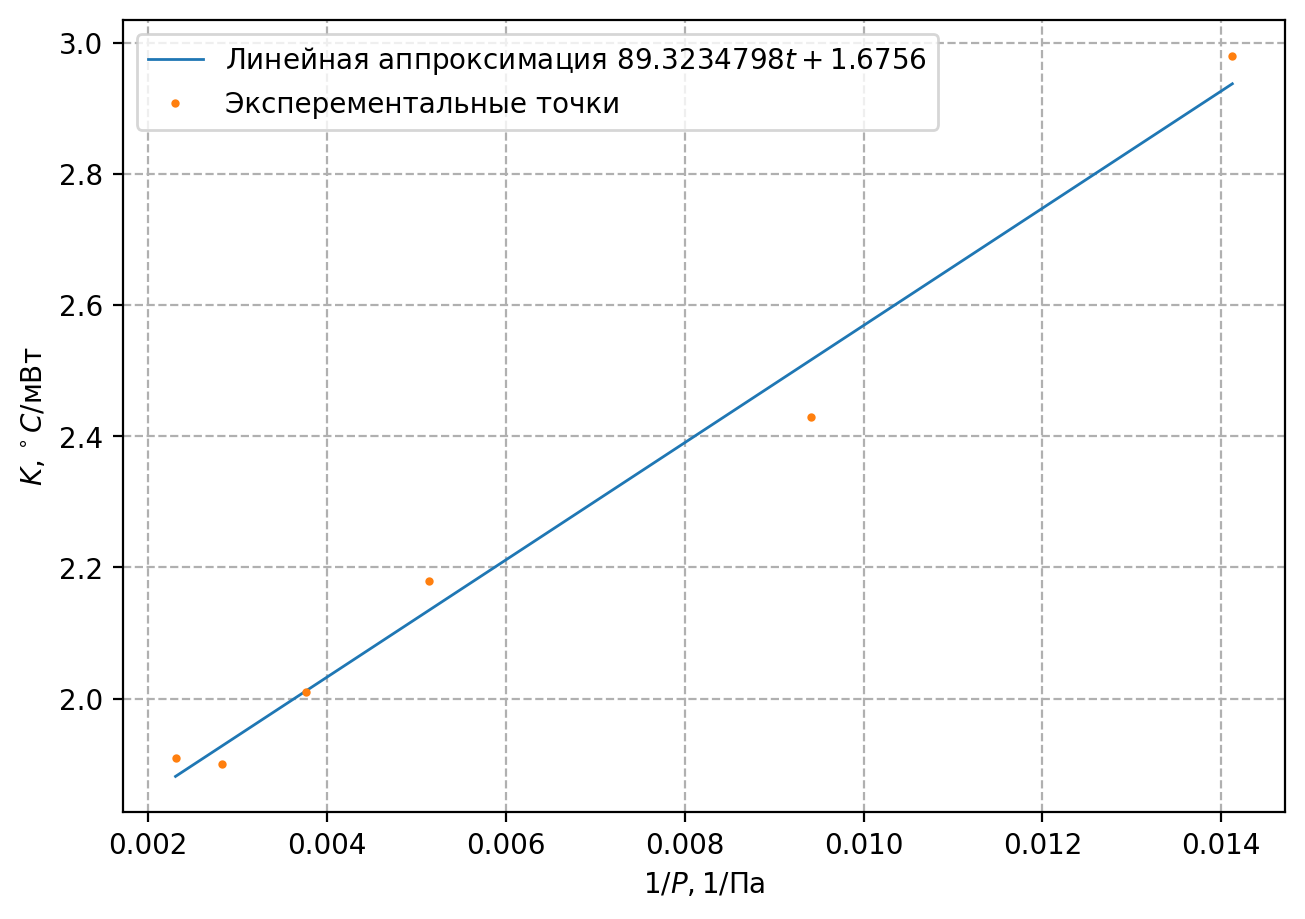

In [33]:
plt.figure(figsize=(30/4,21/4), dpi=200) # размер графика
plt.ylabel("$K, ^\circ C$/мВт ") # подписи к осям
plt.xlabel("$1/P, $1/Па")
plt.grid(True, linestyle="--") # сетка
plt.plot(fin["1/P"].iloc[:6], k3 * fin["1/P"].iloc[:6] + a3,linewidth=1, label="Линейная аппроксимация $%.7f t + %.4f$" % (k3, a3)) # аппроксимация
plt.errorbar(fin["1/P"].iloc[:6], fin["K"].iloc[:6], label="Эксперементальные точки", fmt="o", ms=2)
plt.legend() # легенда

In [26]:
k2,a2=mnk(fin["ln"].iloc[:6], fin["K"].iloc[:6])

Погрешность углового коэфицента
0.08579803353339928
Погрешность свободного коэфицента
0.05520918819891876


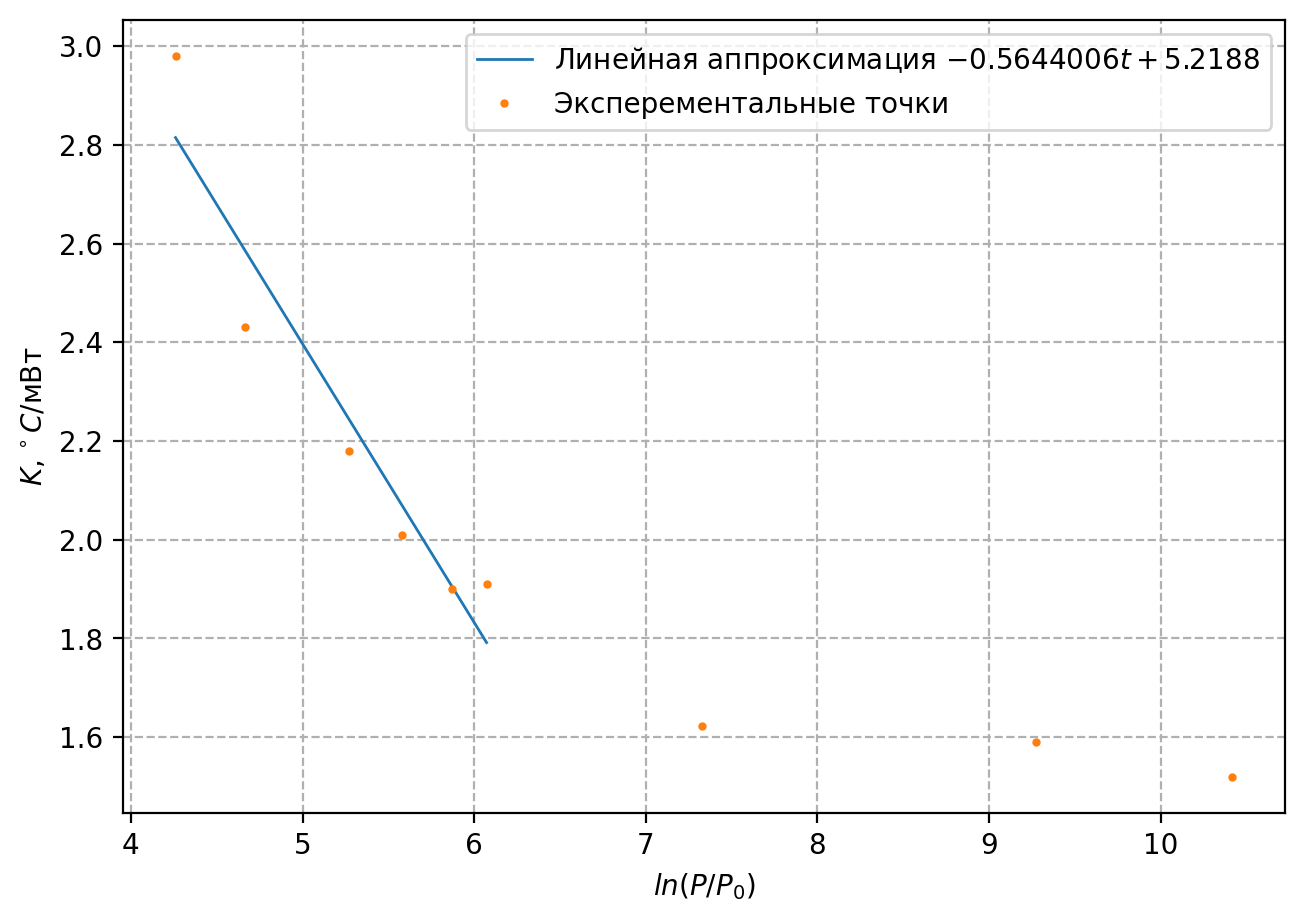

In [30]:
plt.figure(figsize=(30/4,21/4), dpi=200) # размер графика
plt.ylabel("$K, ^\circ C$/мВт ") # подписи к осям
plt.xlabel("$ln(P/P_0)$")
plt.grid(True, linestyle="--") # сетка
plt.plot(fin["ln"].iloc[:6], k2 * fin["ln"].iloc[:6] + a2,linewidth=1, label="Линейная аппроксимация $%.7f t + %.4f$" % (k2, a2)) # аппроксимация
plt.errorbar(fin["ln"], fin["K"], label="Эксперементальные точки", fmt="o", ms=2)
plt.legend() # легенда